# Project: Markowitz Modern portfolio theory

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime
from datetime import date, timedelta
import random

### Inputs of the study

In [2]:
%store -r SBF_120
%store -r CAC_40
%store -r EURO_STOXX_600

In [3]:
# Macro Inputs
Risk_free_asset = 0.02
History = 365 * 20
List = CAC_40
Currency = 'EUR'

# Efficient frontier computation parameters
Lenght_portfolio = 10
Num_portfolios = 1000000

# Optimization:
risk_tolerance = 0.175
expected_return = 0.4

In [4]:
today = date.today()
prev = date.today() - timedelta(days=History)
busday = np.busday_count(prev,today)
print('Business days in the study:',busday)

Business days in the study: 5215


### History acquisition

In [5]:
df = pd.DataFrame(data=(List))
df = df.rename(columns = {0: "Ticker"})

In [6]:
Daily_Change = pd.DataFrame()
x = 0
change = []
currencies = []

if Currency == 'EUR':
    #Change price acquisition for assets libeled in domestic currency (EUR) only
    for n in tqdm(df['Ticker']):
        change = yf.Ticker(n).history(period='max')['Close'].pct_change().iloc[1:]
        change = change[prev:today]
        Daily_Change[n] = change
    df['Currency'] = 'EUR'
else:
    # Currencies scrapping
    for n in tqdm(df['Ticker']):
        currency = yf.Ticker(n).info['currency']
        currencies.append(currency)
    df['Currency'] = currencies
    
    #Change price acquisition for assets libeled in foreign currency
    for n in tqdm(df['Ticker']):
        if df['Currency'][x] == 'EUR':
            change = yf.Ticker(n).history(period='max')['Close'].pct_change().iloc[1:]
            change = change[prev:today]
            Daily_Change[n] = change
            x = x + 1
        else:
            currency_ticker = 'EUR' + df['Currency'][x] + '=X'
            currency_pair = yf.Ticker(currency_ticker).history(period='max')['Close']
            
            Price = (yf.Ticker(n).history(period='yfDuration')['Close'] / currency_pair).dropna()
            change = yf.Ticker(n).history(period='max')['Close'].pct_change().iloc[1:]
            change = change[prev:today]
            Daily_Change[n] = change
            x = x + 1
Daily_Change

100%|███████████████████████████████████████████| 40/40 [00:17<00:00,  2.23it/s]


,ACA.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,SGO.PA,STLA.PA,STM.PA,SU.PA,TEP.PA,TTE.PA,VIE.PA,VIV.PA,AMUN.PA,SW.PA
Date,,,,,,,,,,,,,,,,,,,,,
2002-12-23,-0.017881,0.007968,-0.002885,NaN,0.003147,-0.015424,0.025888,-0.013537,0.076923,-0.006530,...,0.008993,NaN,-0.009601,-0.005341,0.005525,0.019549,-0.040445,-0.016791,NaN,-0.001792
2002-12-24,-0.002023,-0.006324,-0.010607,NaN,0.000000,0.000000,-0.018025,-0.017707,0.000000,0.010329,...,-0.014617,NaN,-0.007143,0.001566,0.000000,0.013274,0.000926,-0.005693,NaN,-0.007630
2002-12-25,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,...,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2002-12-26,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,...,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2002-12-27,-0.012838,-0.028640,-0.033139,NaN,-0.010196,-0.015666,-0.005874,-0.004507,-0.071428,-0.005576,...,-0.005065,NaN,-0.022611,-0.007594,0.000000,-0.032024,0.002777,-0.036259,NaN,-0.018543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,0.001675,-0.004677,0.004120,-0.011647,-0.011850,-0.003970,-0.019062,-0.000291,-0.011883,-0.012574,...,-0.014530,0.000291,-0.009095,-0.008816,-0.005340,0.005862,-0.019421,-0.009778,-0.024613,-0.009605
2022-12-13,0.013481,0.014684,0.012310,0.020202,0.002318,0.018033,0.000617,0.016289,0.014061,0.000719,...,0.019731,0.002324,0.034247,0.028288,0.006264,0.022430,0.015360,0.002693,0.031776,-0.016024
2022-12-14,-0.002784,-0.000289,-0.004230,-0.010726,0.000000,-0.002238,-0.037916,-0.013452,-0.011859,-0.020215,...,-0.000638,0.006376,-0.013907,-0.010919,0.007114,-0.007082,0.010748,-0.000895,-0.009058,0.003428


### Annual Return and Volatility

In [7]:
ReturnList = []
VolatilityList = []
for n in List:
    Volatility = statistics.stdev(Daily_Change[n].dropna()) * statistics.sqrt(250)
    Return = Daily_Change[n].dropna().mean() * 250
    ReturnList.append(Return)
    VolatilityList.append(Volatility)
df['Return'] = ReturnList
df['Volatility'] = VolatilityList
df.head()

,Ticker,Currency,Return,Volatility
0,ACA.PA,EUR,-0.133429,0.725131
1,AI.PA,EUR,0.128066,0.222779
2,AIR.PA,EUR,0.202454,0.370642
3,ALO.PA,EUR,0.100651,0.362540
4,BN.PA,EUR,0.075153,0.216955


In [8]:
df.describe()

,Return,Volatility
count,40.000000,40.000000
mean,0.137129,0.327742
std,0.091397,0.104001
min,-0.133429,0.216955
25%,0.099307,0.271343
50%,0.128946,0.305446
75%,0.174242,0.354613
max,0.537048,0.725131


In [9]:
Return = Daily_Change.mean() * 250
Covariance = Daily_Change.cov() * 250

#### Table of Correlation

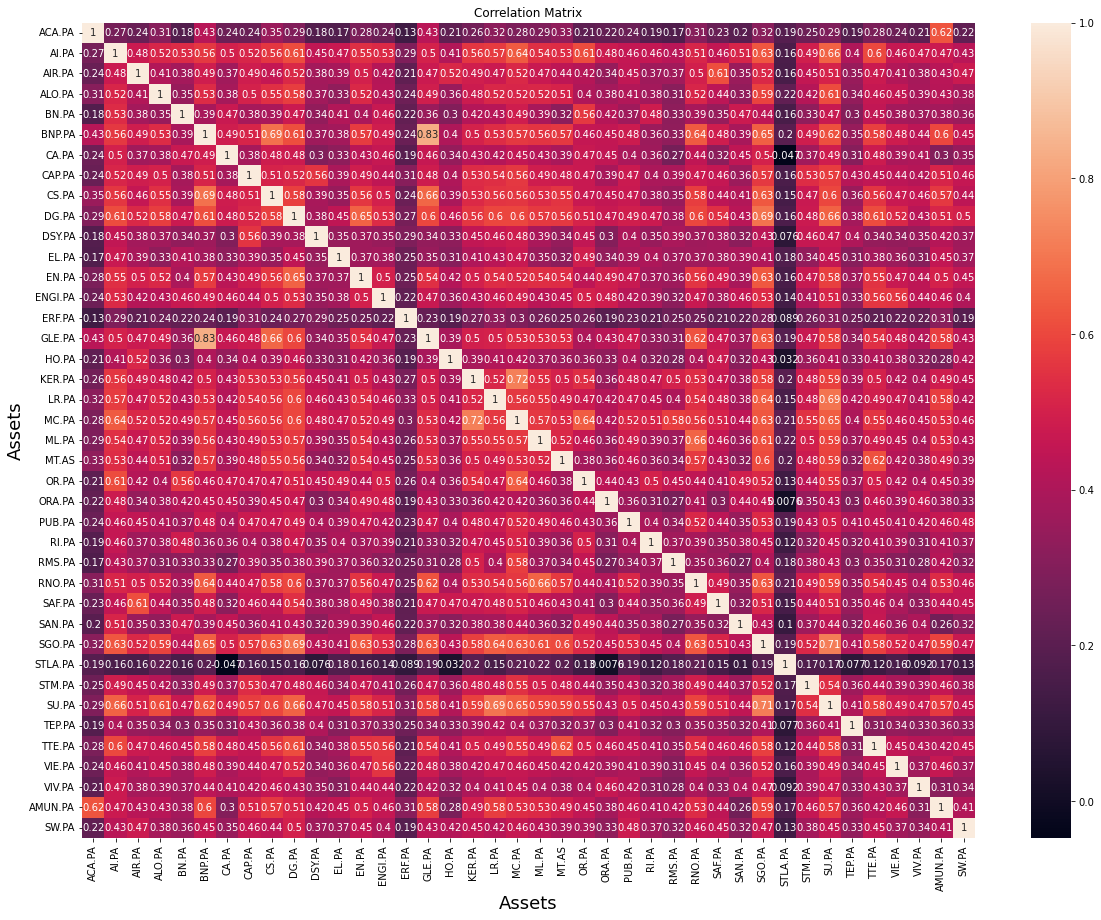

In [10]:
if len(df.index) > 40:
    pass
else: 
    Corr = Daily_Change.corr()
    plt.figure(figsize=(20,15))
    sns.heatmap(Corr, annot=True)
    plt.title('Correlation Matrix')
    plt.xlabel('Assets',fontsize=18)
    plt.ylabel('Assets',fontsize=18)
    plt.show()

### Efficient Frontier

In [11]:
Markovitz = pd.DataFrame()
port_returns = []
port_volatility = []
stock_weights = []
port_sharpe = []

Num_assets = int(len(df))

for single_portfolio in tqdm(range(Num_portfolios)):
    # Select randomly assets of the portfolio according to the length asked 
    weights = []
    dic = {}
    stock = random.sample(sorted(df['Ticker']), Lenght_portfolio)
    weight = sorted(np.random.dirichlet(np.ones(Lenght_portfolio),size=1))
    for i in range(0,len(stock)):
        dic[stock[i]] = weight[0][i]
    for n in df['Ticker']:
        if n in dic:
            weights.append(dic[n])
        else:
            weights.append(0) 

    #Compute return, volatility and sharpe ratio of the portfolio according to weights of its assets
    returns = np.dot(weights, Return)
    volatility = np.sqrt(np.dot(weights, np.dot(Covariance, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    sharpe = (returns - Risk_free_asset) / volatility
    port_sharpe.append(sharpe)

portfolio = {'Return': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': port_sharpe}

# Creation of the DataFrame
for counter,symbol in tqdm(enumerate(df['Ticker'])):
    portfolio[symbol] = [weight[counter] for weight in stock_weights]

Markowitz = pd.DataFrame(portfolio)
Markowitz.describe()

100%|███████████████████████████████| 1000000/1000000 [02:18<00:00, 7214.46it/s]
40it [00:04,  8.53it/s]


,Return,Volatility,Sharpe Ratio,ACA.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CA.PA,...,SGO.PA,STLA.PA,STM.PA,SU.PA,TEP.PA,TTE.PA,VIE.PA,VIV.PA,AMUN.PA,SW.PA
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.137109,0.235579,0.503822,0.024957,0.024942,0.025042,0.025002,0.025064,0.025011,0.025017,...,0.024950,0.024915,0.025073,0.024976,0.024957,0.024925,0.025055,0.025010,0.025106,0.024910
std,0.036135,0.029782,0.149046,0.062530,0.062597,0.062617,0.062723,0.062773,0.062621,0.062651,...,0.062522,0.062448,0.062743,0.062626,0.062590,0.062467,0.062730,0.062669,0.062850,0.062450
min,-0.063584,0.168712,-0.158785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117098,0.215028,0.416237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.134142,0.230964,0.501196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.153107,0.250461,0.591125,0.000049,0.000000,0.000227,0.000000,0.000151,0.000299,0.000000,...,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000215,0.000000
max,0.427280,0.559488,1.070129,0.738921,0.733793,0.757696,0.757722,0.769896,0.760517,0.785849,...,0.757390,0.722787,0.760026,0.753262,0.761392,0.756135,0.751234,0.770068,0.765199,0.758907


In [12]:
counter

39

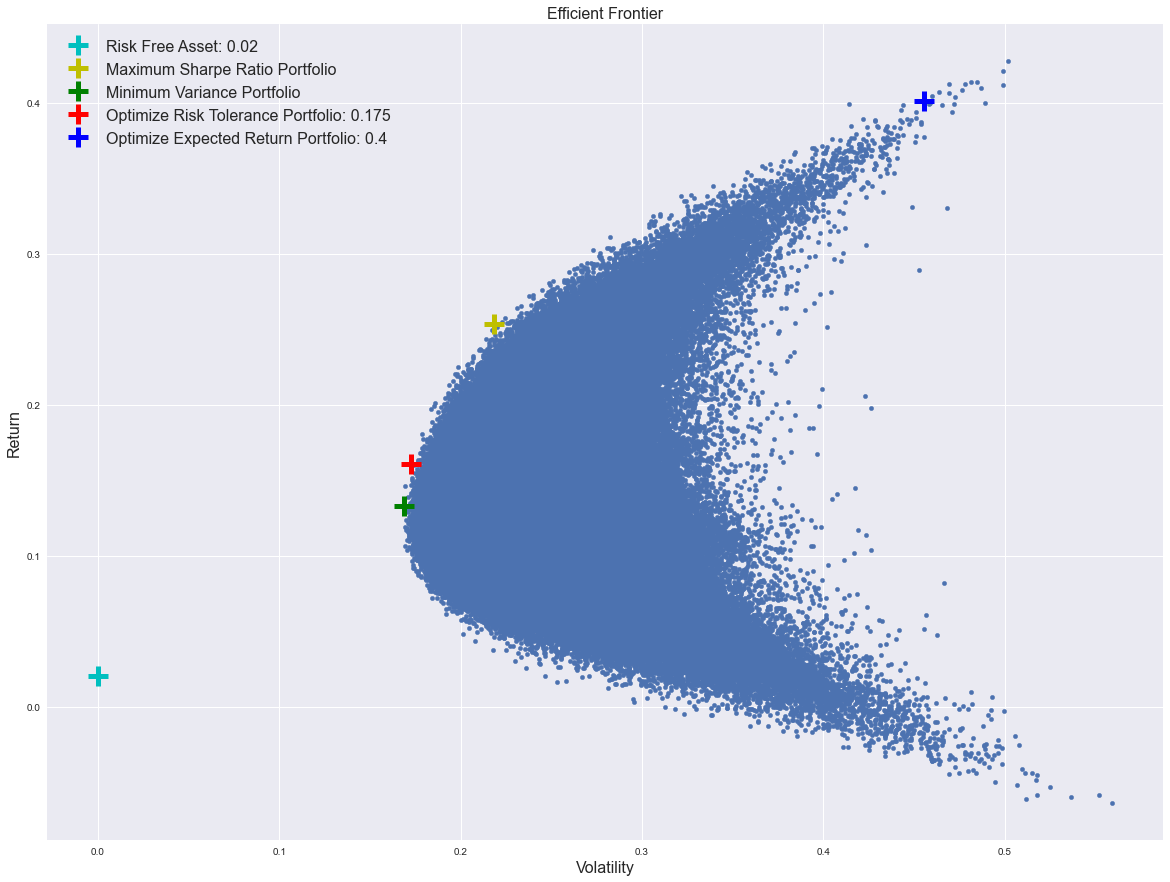

In [13]:
plt.style.use('seaborn')
Markowitz.plot.scatter(x='Volatility', y= 'Return', figsize=(20, 15), grid=True)
plt.xlabel('Volatility', fontsize=16)
plt.ylabel('Return', fontsize=16)
plt.title('Efficient Frontier', fontsize=16)

# Risk free asset
plt.plot(0, 0.02,'c+', markeredgewidth=5, markersize=20, label='Risk Free Asset: ' + str(Risk_free_asset))

# Portfolio Best Sharpe ratio
Best_sharpe_return = Markowitz.loc[Markowitz['Sharpe Ratio'].idxmax()]['Return']
Best_sharpe_volatility =  Markowitz.loc[Markowitz['Sharpe Ratio'].idxmax()]['Volatility']
plt.plot(Best_sharpe_volatility, 
         Best_sharpe_return, 
         'y+',
         markeredgewidth=5, 
         markersize=20, 
         label='Maximum Sharpe Ratio Portfolio')

# Portfolio Minimum variance
Minimum_variance_return = Markowitz.loc[Markowitz['Volatility'].idxmin()]['Return']
Minimum_variance_volatility =  Markowitz.loc[Markowitz['Volatility'].idxmin()]['Volatility']
plt.plot(Minimum_variance_volatility, 
         Minimum_variance_return, 
         'g+',
         markeredgewidth=5, 
         markersize=20, 
         label='Minimum Variance Portfolio')


# Portfolio Risk Tolerance Optimum
try:
    label = 'Optimize Risk Tolerance Portfolio: ' + str(risk_tolerance)
    df_risk_tolerance = Markowitz.loc[Markowitz['Volatility'] < risk_tolerance]
    Risk_tolerance_return = df_risk_tolerance.loc[df_risk_tolerance['Return'].idxmax()]['Return']
    Risk_tolerance_volatility = df_risk_tolerance.loc[df_risk_tolerance['Return'].idxmax()]['Volatility']
    plt.plot(Risk_tolerance_volatility,
             Risk_tolerance_return,
             'r+',
             markeredgewidth=5,
             markersize=20,
             label=label)
except:
    pass

# Portfolio Expected Return Optimum
try:
    label = 'Optimize Expected Return Portfolio: ' + str(expected_return)
    df_expected_return = Markowitz.loc[Markowitz['Return'] > expected_return]
    Expected_return_r = df_expected_return.loc[df_expected_return['Volatility'].idxmin()]['Return']
    Expected_return_v = df_expected_return.loc[df_expected_return['Volatility'].idxmin()]['Volatility']
    plt.plot(Expected_return_v,
             Expected_return_r,
             'b+',
             markeredgewidth=5,
             markersize=20,
             label=label)
except:
    pass

plt.legend(loc='best',prop={"size":16})

plt.show()

### Study of relevant portfolios

#### Reference Indice

In [14]:
Indice = yf.Ticker('^FCHI').history(period='max')['Close'].pct_change().iloc[1:]
Indice = Indice[prev:today]
Indice_Return = Indice.mean() * 250
Indice_Volatility = statistics.stdev(Indice) * statistics.sqrt(250)
Sharpe_ratio = (Indice_Return - Risk_free_asset) / Indice_Volatility
print('CAC 40:\nReturn: ',Indice_Return,
      '\nVolatility: ',Indice_Volatility,
      '\nSharpe Ratio:',Sharpe_ratio)

CAC 40:
Return:  0.0591430249372804 
Volatility:  0.21453426260319622 
Sharpe Ratio: 0.18245582063355337


In [15]:
df2 = pd.DataFrame()

port_sharpe_ratio = Markowitz.loc[Markowitz['Sharpe Ratio'].idxmax()]
port_minimum_variance = Markowitz.loc[Markowitz['Volatility'].idxmin()]
port_list = ['Maximum Sharpe Ratio','Minimum Variance Portfolio']

df2 = df2.append([port_sharpe_ratio,port_minimum_variance])

try : 
    df_risk_tolerance = Markowitz.loc[Markowitz['Volatility'] < risk_tolerance]
    port_optimize_risk_tolerance = df_risk_tolerance.loc[df_risk_tolerance['Return'].idxmax()]
    name = 'Optimize Risk Tolerance Portfolio: ' + str(risk_tolerance)
    port_list.append(name)
    df2 = df2.append(port_optimize_risk_tolerance)  
except:
    pass

try : 
    df_expected_return = Markowitz.loc[Markowitz['Return'] > expected_return]
    port_optimize_excpected_return = df_expected_return.loc[df_expected_return['Volatility'].idxmin()]
    name = 'Optimize Expected Return Portfolio: ' + str(expected_return)
    port_list.append(name)
    df2 = df2.append(port_optimize_excpected_return)
except:
    pass

df2['Portfolio'] = port_list

cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df2[cols]

df2 = df2.reset_index(drop=True)

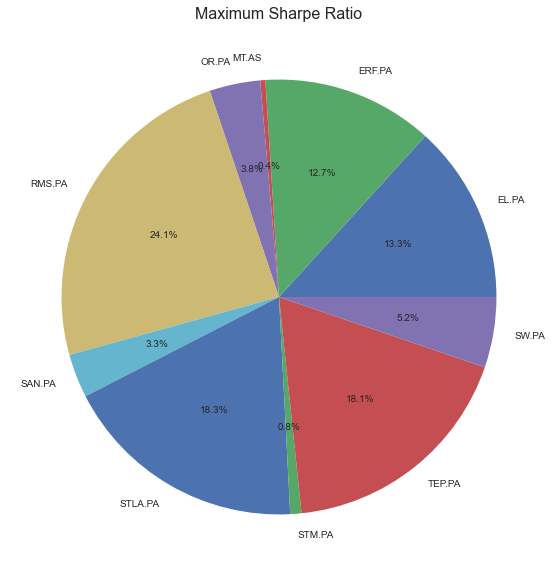

History: 7300 Days 
Annual Return: 0.2536996566399452 
Annual Volatility: 0.21838465530252477 
Sharpe Ratio: 1.070128559702168 
Alpha of the portfolio:  0.1945566317026648 
Portfolio of 10 assets


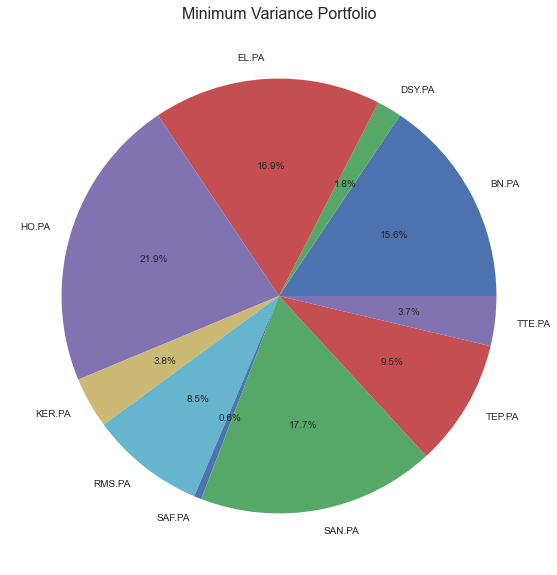

History: 7300 Days 
Annual Return: 0.13261643360592526 
Annual Volatility: 0.1687120698109832 
Sharpe Ratio: 0.6675066800620444 
Alpha of the portfolio:  0.07347340866864485 
Portfolio of 10 assets


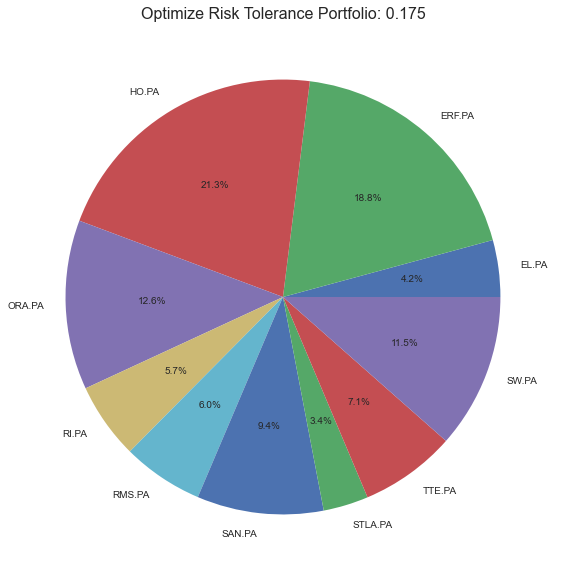

History: 7300 Days 
Annual Return: 0.1603656660045577 
Annual Volatility: 0.17246323674924166 
Sharpe Ratio: 0.8138874617588604 
Alpha of the portfolio:  0.1012226410672773 
Portfolio of 10 assets


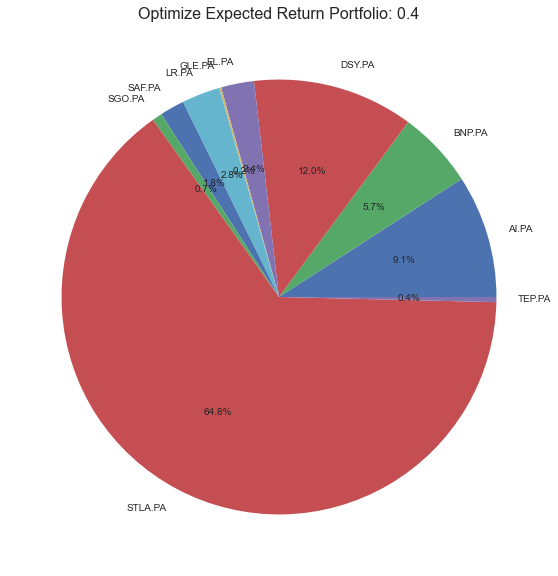

History: 7300 Days 
Annual Return: 0.40119971672713955 
Annual Volatility: 0.4552822424929662 
Sharpe Ratio: 0.8372821980488923 
Alpha of the portfolio:  0.34205669178985915 
Portfolio of 10 assets


In [16]:
for n in range(0,len(df2)):
    asset_weights = []
    asset_labels = []
    asset_returns = []
    name = df2['Portfolio'][n]
    port = df2.iloc[n,]

    for asset in range(0,len(df2.columns)):
        if asset < 4:
            pass
        else:
            if port[asset] == 0:
                pass
            else:
                weight = port[asset]
                asset_weights.append(weight)
                label = df2.columns[asset]
                asset_labels.append(label)

    fig = plt.figure(figsize=(10,10))
    fig = plt.title(name, fontsize=16)
    fig = plt.pie(asset_weights,labels = asset_labels,autopct='%1.1f%%')
    plt.show(fig) 
    alpha = port[1] - Indice_Return 
    print('History:',History,'Days',
          '\nAnnual Return:', port[1],
          '\nAnnual Volatility:', port[2],
          '\nSharpe Ratio:', port[3],
          '\nAlpha of the portfolio: ',alpha,
          '\nPortfolio of',Lenght_portfolio,'assets')